# Exploratory data analysis (Glassdoor)

- Feature engineering

In [1]:
# Author: Priti Gupta
# Date: June 8th, 2023
# Description: Scrapping data from glassdoor to analyse salaries of data science positions in India
# GitHub: https://github.com/PritiG1/DS-SalaryPredictor

import pandas as pd

df = pd.read_csv('salary_clean_glassdoor.csv')
pd.set_option('display.max_rows',None)

In [2]:
# write a code to simplify job designations

def title_simplify(title):

    if 'data scientist' in title.lower():
        return 'Data Scientist'
    elif 'analyst' in title.lower() or 'analytics' in title.lower():
        return 'Data Analyst'
    elif 'intern' in title.lower():
        return 'Data science Intern'
    elif 'ml engineer' in title.lower() or 'artificial intelligence' in title.lower()\
          or 'machine learning engineer' in title.lower() or 'ai engineer' in title.lower() or 'nlp' in title.lower() or 'science' in title.lower():
        return 'ML Engineer'
    elif 'data scientist - engineer' in title.lower() or 'data science engineer' in title.lower():
        return 'data engineer'
    elif 'director' in title.lower():
        return 'director'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'associate' in title.lower():
        return 'associate'
    elif 'lead' in title.lower():
        return 'Lead'
    elif 'developer' in title.lower() or 'python' in title.lower():
        return 'python developer'
    else:
        return title

df['Job title'] = df['Title'].apply(lambda x: title_simplify(x))

In [3]:
# rearranging the coloumns
last_column = df.columns[-1]  # Get the name of the last column
df.insert(0, last_column, df.pop(last_column))


In [4]:
df.drop('Title',axis=1,inplace=True)
df.to_csv('FE_glassdoor_salary.csv',index=False)

In [5]:
df['Job title'].value_counts()

Job title
Data Scientist         514
ML Engineer            120
Data Analyst            55
Data science Intern     36
Name: count, dtype: int64

## Visualisation of data (Glassdoor)

In [6]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

df = pd.read_csv('FE_glassdoor_salary.csv')

df.head()


,Job title,Company,Location,Salary (L),Salary (Employer est.),Salary (Glassdoor est.),min Salary (L),max Salary (L),avg salary (L)
0,Data Scientist,RedBus,Bengaluru,50,1,0,50.0,50.0,50.00
1,Data Scientist,Reqroots,Tiruchchirāppalli,0.4 - 0.7,1,0,0.4,0.7,0.55
2,Data Scientist,PayPal,Chennai,2 - 3,0,1,2.0,3.0,2.50
3,Data Scientist,DataBuzz Ltd,Hyderābād,40,1,0,40.0,40.0,40.00
4,Data Scientist,Perfios,Bengaluru,2 - 8,0,1,2.0,8.0,5.00


In [7]:
# summary stats of salary irrespective of glassdoor or employer estimate.
df[['avg salary (L)','min Salary (L)','max Salary (L)']].describe()

,avg salary (L),min Salary (L),max Salary (L)
count,725.000000,725.000000,725.000000
mean,10.206800,8.405241,12.008359
std,11.193019,10.919595,11.959318
min,0.015000,0.010000,0.020000
25%,5.000000,4.000000,7.000000
50%,7.000000,5.000000,9.000000
75%,8.500000,8.000000,10.000000
max,50.000000,50.000000,50.000000


In [8]:
# summary stats of salary (glassdoor estimate)

# seperating the data sets

df_sal_glass = df[df['Salary (Glassdoor est.)'] == 1]
df_sal_emp = df[df['Salary (Employer est.)'] == 1]


In [9]:
df_sal_glass[['avg salary (L)','min Salary (L)','max Salary (L)']].describe()

,avg salary (L),min Salary (L),max Salary (L)
count,492.000000,492.000000,492.000000
mean,6.559959,4.981707,8.138211
std,1.786736,1.973777,2.011475
min,2.000000,1.000000,3.000000
25%,6.000000,4.000000,8.000000
50%,6.500000,4.000000,9.000000
75%,8.500000,7.000000,9.000000
max,10.000000,10.000000,11.000000


In [10]:
df_sal_emp[['avg salary (L)','min Salary (L)','max Salary (L)']].describe()

,avg salary (L),min Salary (L),max Salary (L)
count,233.000000,233.000000,233.000000
mean,17.907425,15.634335,20.180515
std,17.217894,16.926833,18.410292
min,0.015000,0.010000,0.020000
25%,0.250000,0.200000,0.300000
50%,22.500000,10.000000,25.000000
75%,27.500000,25.000000,35.000000
max,50.000000,50.000000,50.000000


In [11]:
df['Job title'].value_counts()

Job title
Data Scientist         514
ML Engineer            120
Data Analyst            55
Data science Intern     36
Name: count, dtype: int64

### Plots

In [12]:
df.columns

Index(['Job title', 'Company', 'Location', 'Salary (L)',
       'Salary (Employer est.)', 'Salary (Glassdoor est.)', 'min Salary (L)',
       'max Salary (L)', 'avg salary (L)'],
      dtype='object')

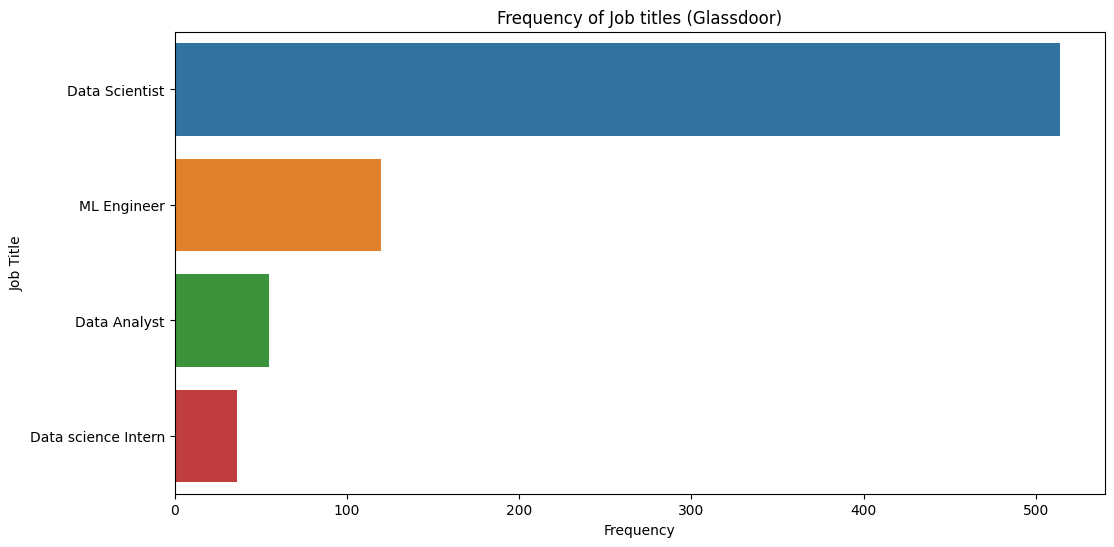

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Title' and 'Company' are the respective columns in your DataFrame
Job_Title = df['Job title'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=Job_Title.values, y=Job_Title.index)
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.title('Frequency of job titles (Glassdoor)')
plt.show()


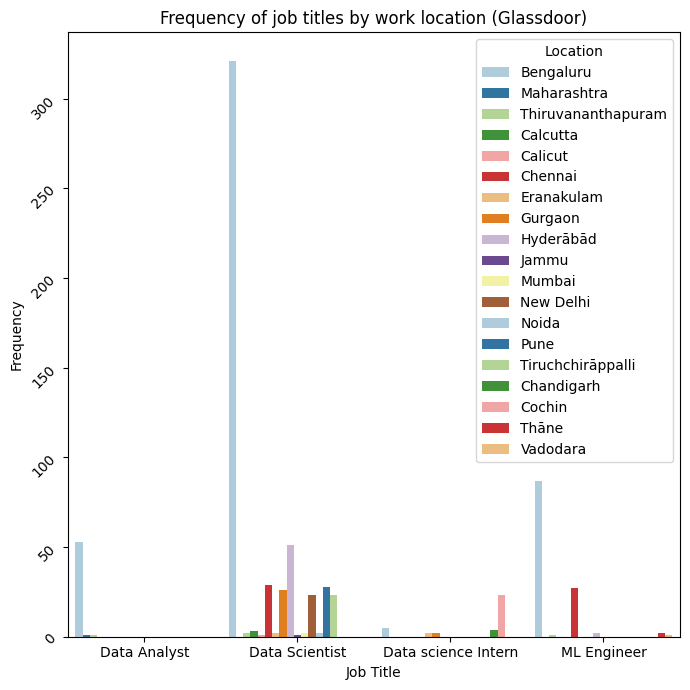

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Title' and 'Company' are the respective columns in your DataFrame
title_counts = df.groupby(['Job title', 'Location']).size().reset_index(name='Frequency')

# Plotting the bar plot
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed
sns.barplot(y='Frequency', x='Job title', hue='Location',data=title_counts,palette='Paired',width=0.9)
plt.ylabel('Frequency')
plt.xlabel('Job Title')
plt.title('Frequency of job titles by work location (Glassdoor)')
plt.legend(title='Company')
plt.yticks(rotation=45, ha='right')
plt.legend(title='Location', bbox_to_anchor=(1, 1),loc='upper right')
plt.tight_layout()  # Improve the spacing between subplots and labels
plt.show()


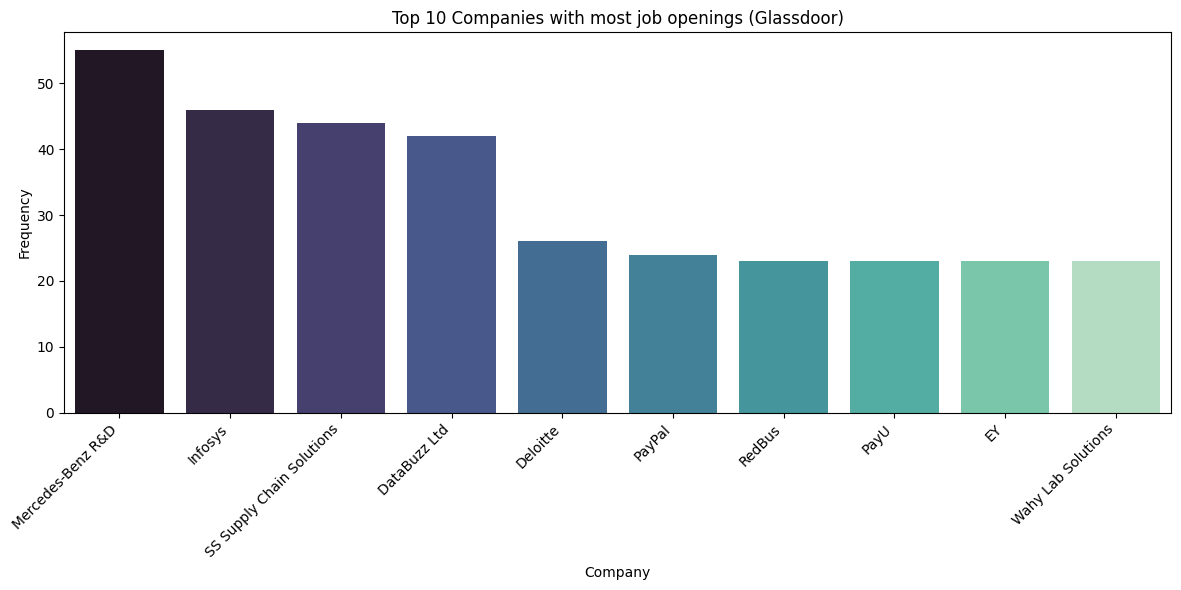

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Title' and 'Company' are the respective columns in your DataFrame
company_counts = df['Company'].value_counts().nlargest(10)  # Select the top 10 companies

# Replace a specific long label with a different name
company_counts.index = company_counts.index.where(company_counts.index != 'Mercedes-Benz Research and Development India Private Limited', 'Mercedes-Benz R&D')

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=company_counts.index, y=company_counts.values, palette=('mako'))
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Top 10 Companies with most job openings (Glassdoor)')
plt.xticks(rotation=45, ha='right')
#sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
#------------------------------------------------------------

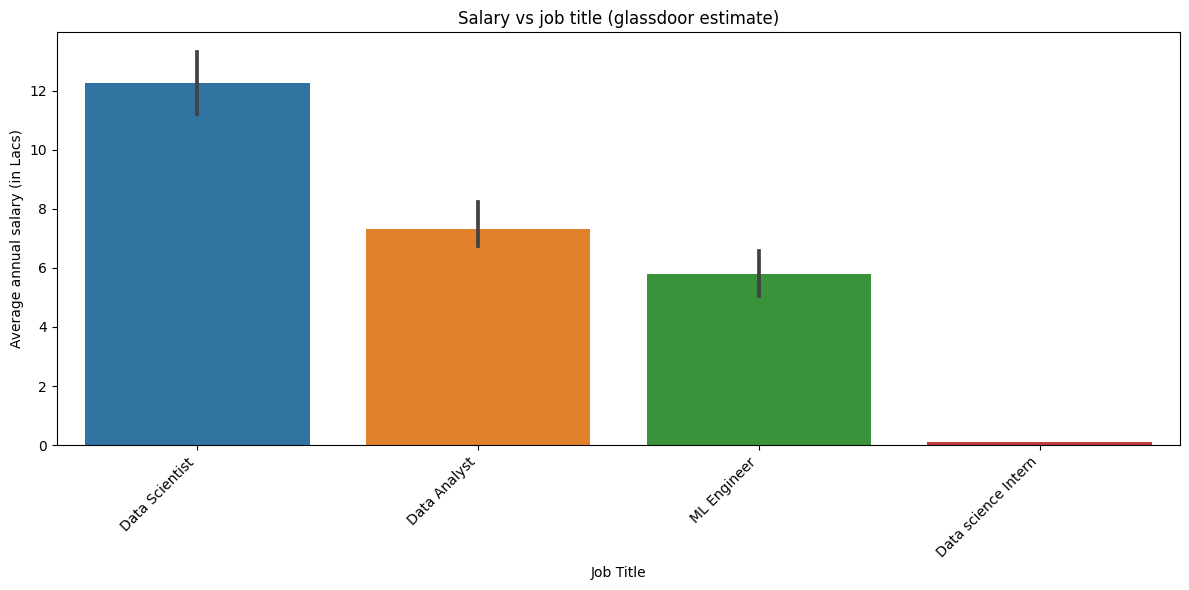

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'job' and 'salary' are the respective columns in your DataFrame
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Job title', y='avg salary (L)', data=df)
plt.xlabel('Job Title')
plt.ylabel('Average annual salary (in Lacs)')
plt.title('Salary vs job title (glassdoor estimate)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
